In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("Amazon Customer Behavior Survey.csv")
plt.rcParams['font.family'] = 'Times New Roman'

In [2]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


In [3]:
df.columns = df.columns.str.strip()
missing_values = df.isnull().sum()
missing_values

Timestamp                                0
age                                      0
Gender                                   0
Purchase_Frequency                       0
Purchase_Categories                      0
Personalized_Recommendation_Frequency    0
Browsing_Frequency                       0
Product_Search_Method                    2
Search_Result_Exploration                0
Customer_Reviews_Importance              0
Add_to_Cart_Browsing                     0
Cart_Completion_Frequency                0
Cart_Abandonment_Factors                 0
Saveforlater_Frequency                   0
Review_Left                              0
Review_Reliability                       0
Review_Helpfulness                       0
Personalized_Recommendation_Frequency    0
Recommendation_Helpfulness               0
Rating_Accuracy                          0
Shopping_Satisfaction                    0
Service_Appreciation                     0
Improvement_Areas                        0
dtype: int6

In [4]:
# Handling Missing Values
# Replace missing values in 'Product_Search_Method' with mode
df['Product_Search_Method'] = df['Product_Search_Method'].fillna(df['Product_Search_Method'].mode()[0])
missing_values = df.isnull().sum()
missing_values

Timestamp                                0
age                                      0
Gender                                   0
Purchase_Frequency                       0
Purchase_Categories                      0
Personalized_Recommendation_Frequency    0
Browsing_Frequency                       0
Product_Search_Method                    0
Search_Result_Exploration                0
Customer_Reviews_Importance              0
Add_to_Cart_Browsing                     0
Cart_Completion_Frequency                0
Cart_Abandonment_Factors                 0
Saveforlater_Frequency                   0
Review_Left                              0
Review_Reliability                       0
Review_Helpfulness                       0
Personalized_Recommendation_Frequency    0
Recommendation_Helpfulness               0
Rating_Accuracy                          0
Shopping_Satisfaction                    0
Service_Appreciation                     0
Improvement_Areas                        0
dtype: int6

In [5]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


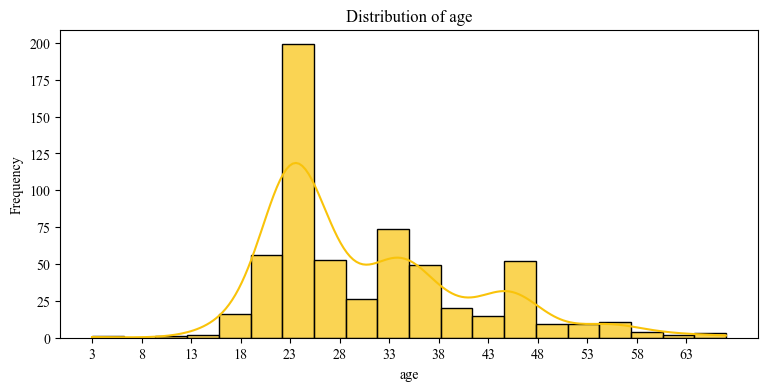

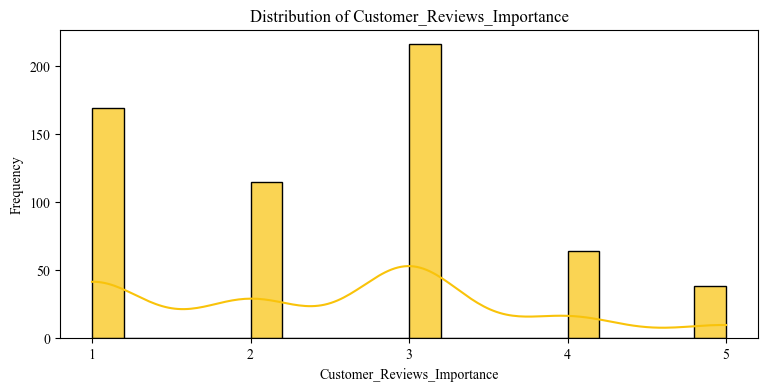

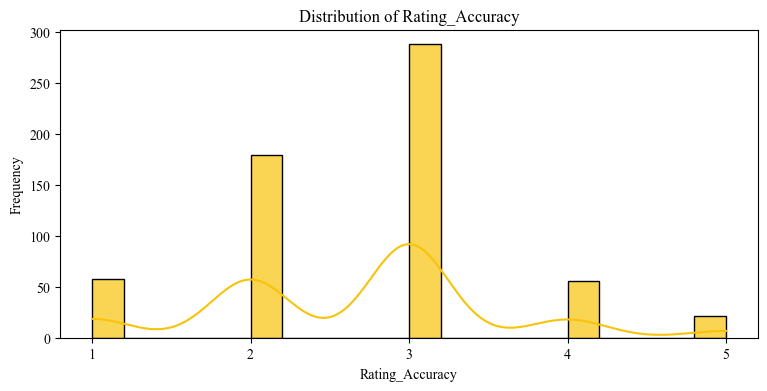

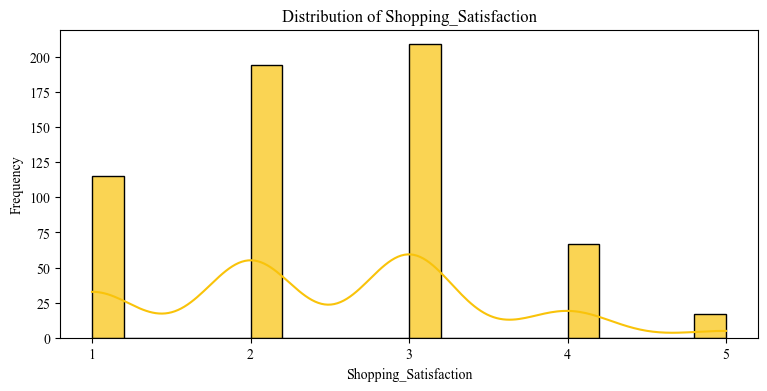

In [6]:
num_features = ['age', 'Customer_Reviews_Importance', 'Rating_Accuracy', 'Shopping_Satisfaction']
for feature in num_features:
    plt.figure(figsize=(9, 4))
    sns.histplot(
        df[feature], 
        kde=True, 
        bins=20, 
        color='#F9C30A',  # Light goledn
        line_kws={'color': '#F7B902'},  # KDE curve yellow
        alpha=0.7  # transparent
    )
    
    min_value = int(df[feature].min())
    max_value = int(df[feature].max())
    
    if feature == 'age':
        plt.xticks(np.arange(min_value, max_value + 1, 5))
    else:
        plt.xticks(np.arange(min_value, max_value + 1, 1))

    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

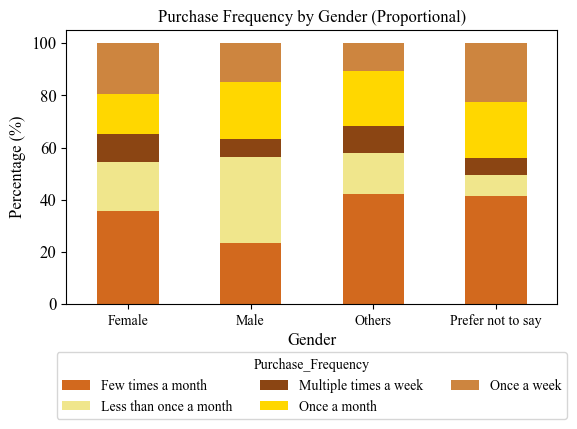

In [7]:
cross_tab = pd.crosstab(df['Gender'], df['Purchase_Frequency'])
cross_tab_percentage = cross_tab.div(cross_tab.sum(axis=1), axis=0) * 100

fig, ax = plt.subplots(figsize=(6, 4.5))
cross_tab_percentage.plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    color=['#D2691E', '#F0E68C', '#8B4513', '#FFD700', '#CD853F'],  # Brown and yellow colors
    width=0.5  
)

# Set title and lables
plt.title('Purchase Frequency by Gender (Proportional)', fontsize=12)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=0) 
plt.yticks(fontsize=12)

# legend go down
plt.legend(title='Purchase_Frequency', bbox_to_anchor=(0.5, -0.15), loc='upper center', ncol=3)
plt.tight_layout()  # auto adjustment

plt.show()

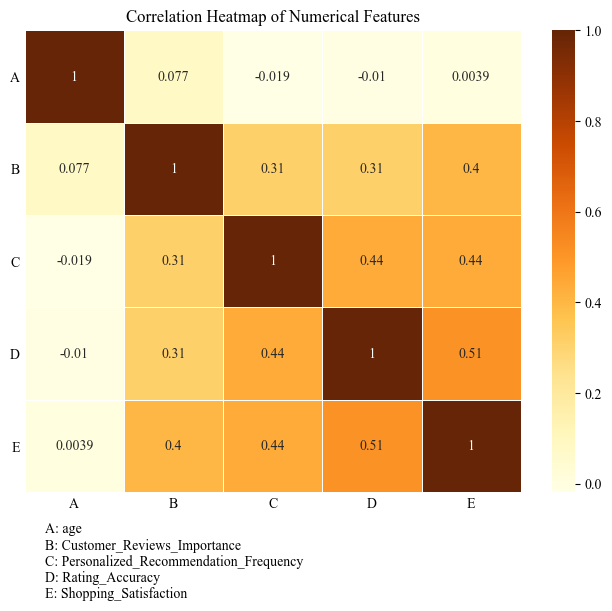

In [8]:

plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlOrBr', linewidths=0.5, cbar_kws={'orientation': 'vertical'})

ticks = range(len(corr_matrix.columns))
labels = [chr(65 + i) for i in range(len(corr_matrix.columns))]

plt.xticks(ticks=ticks)
plt.yticks(ticks=ticks)
plt.gca().set_xticks([x + 0.5 for x in ticks], minor=True)
plt.gca().set_xticklabels(labels, minor=True)
plt.gca().set_yticks([y + 0.5 for y in ticks], minor=True)
plt.gca().set_yticklabels(labels, minor=True)

plt.gca().tick_params(which='both', length=0)

legend_labels = {
    'A': 'age',
    'B': 'Customer_Reviews_Importance',
    'C': 'Personalized_Recommendation_Frequency',
    'D': 'Rating_Accuracy',
    'E': 'Shopping_Satisfaction'
}

legend_text = '\n'.join([f'{key}: {value}' for key, value in legend_labels.items()])
plt.gcf().text(0.15, 0.06, legend_text, fontsize=10, verticalalignment='top')

plt.title('Correlation Heatmap of Numerical Features', fontsize=12, loc='center', wrap=True)
plt.show()

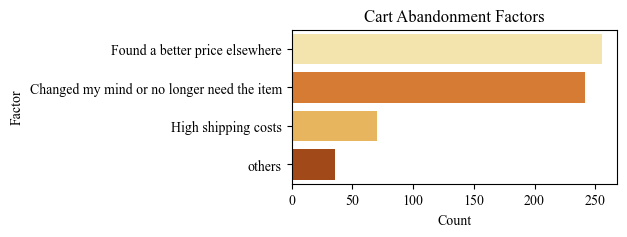

<Figure size 640x480 with 0 Axes>

In [9]:
plt.figure(figsize=(4.2, 2))
sns.countplot(y='Cart_Abandonment_Factors', data=df, hue='Cart_Abandonment_Factors', palette='YlOrBr', order=df['Cart_Abandonment_Factors'].value_counts().index)
plt.legend([], [], frameon=False)
plt.title('Cart Abandonment Factors')
plt.xlabel('Count')
plt.ylabel('Factor')
plt.figure(constrained_layout=True)
plt.show()

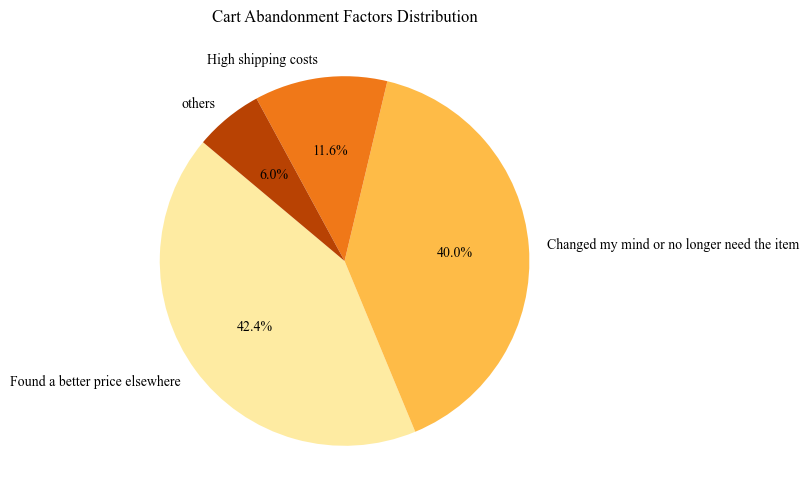

In [10]:
# Pie chart
plt.figure(figsize=(8, 6))
abandonment_counts = df['Cart_Abandonment_Factors'].value_counts()

plt.pie(
    abandonment_counts,
    labels=abandonment_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('YlOrBr', len(abandonment_counts)),
    startangle=140
)
plt.title('Cart Abandonment Factors Distribution')
plt.show()